<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AAx_2_Lab2_Submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2 & Submit**

#Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Step 1:
- Import the boston house dataset from sklearn.datasets.

from sklearn.datasets import load_boston

boston = load_boston()

- Create train and test datasets.

- Check the data description and familiarize yourself with the data.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive/')
%cd /content/drive/My Drive/Datasets/

boston = pd.read_csv("boston_house_prices.csv")

X=boston.drop('MEDV',axis=1).values
y=boston['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(boston.values[:,:-1], boston.values[:,-1], test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets
Training data shape: (404, 13)
Testing data shape: (102, 13)


we create feature matrix X and target vector y from the dataset, splits the data into training and test sets using train_test_split function from sklearn.model_selection, and prints out the data description using the DESCR attribute of the dataset.

#####Boston house prices dataset Data Set Characteristics:

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

#Step 2: 
Create a scatter plot of each attribute with the mean house price.



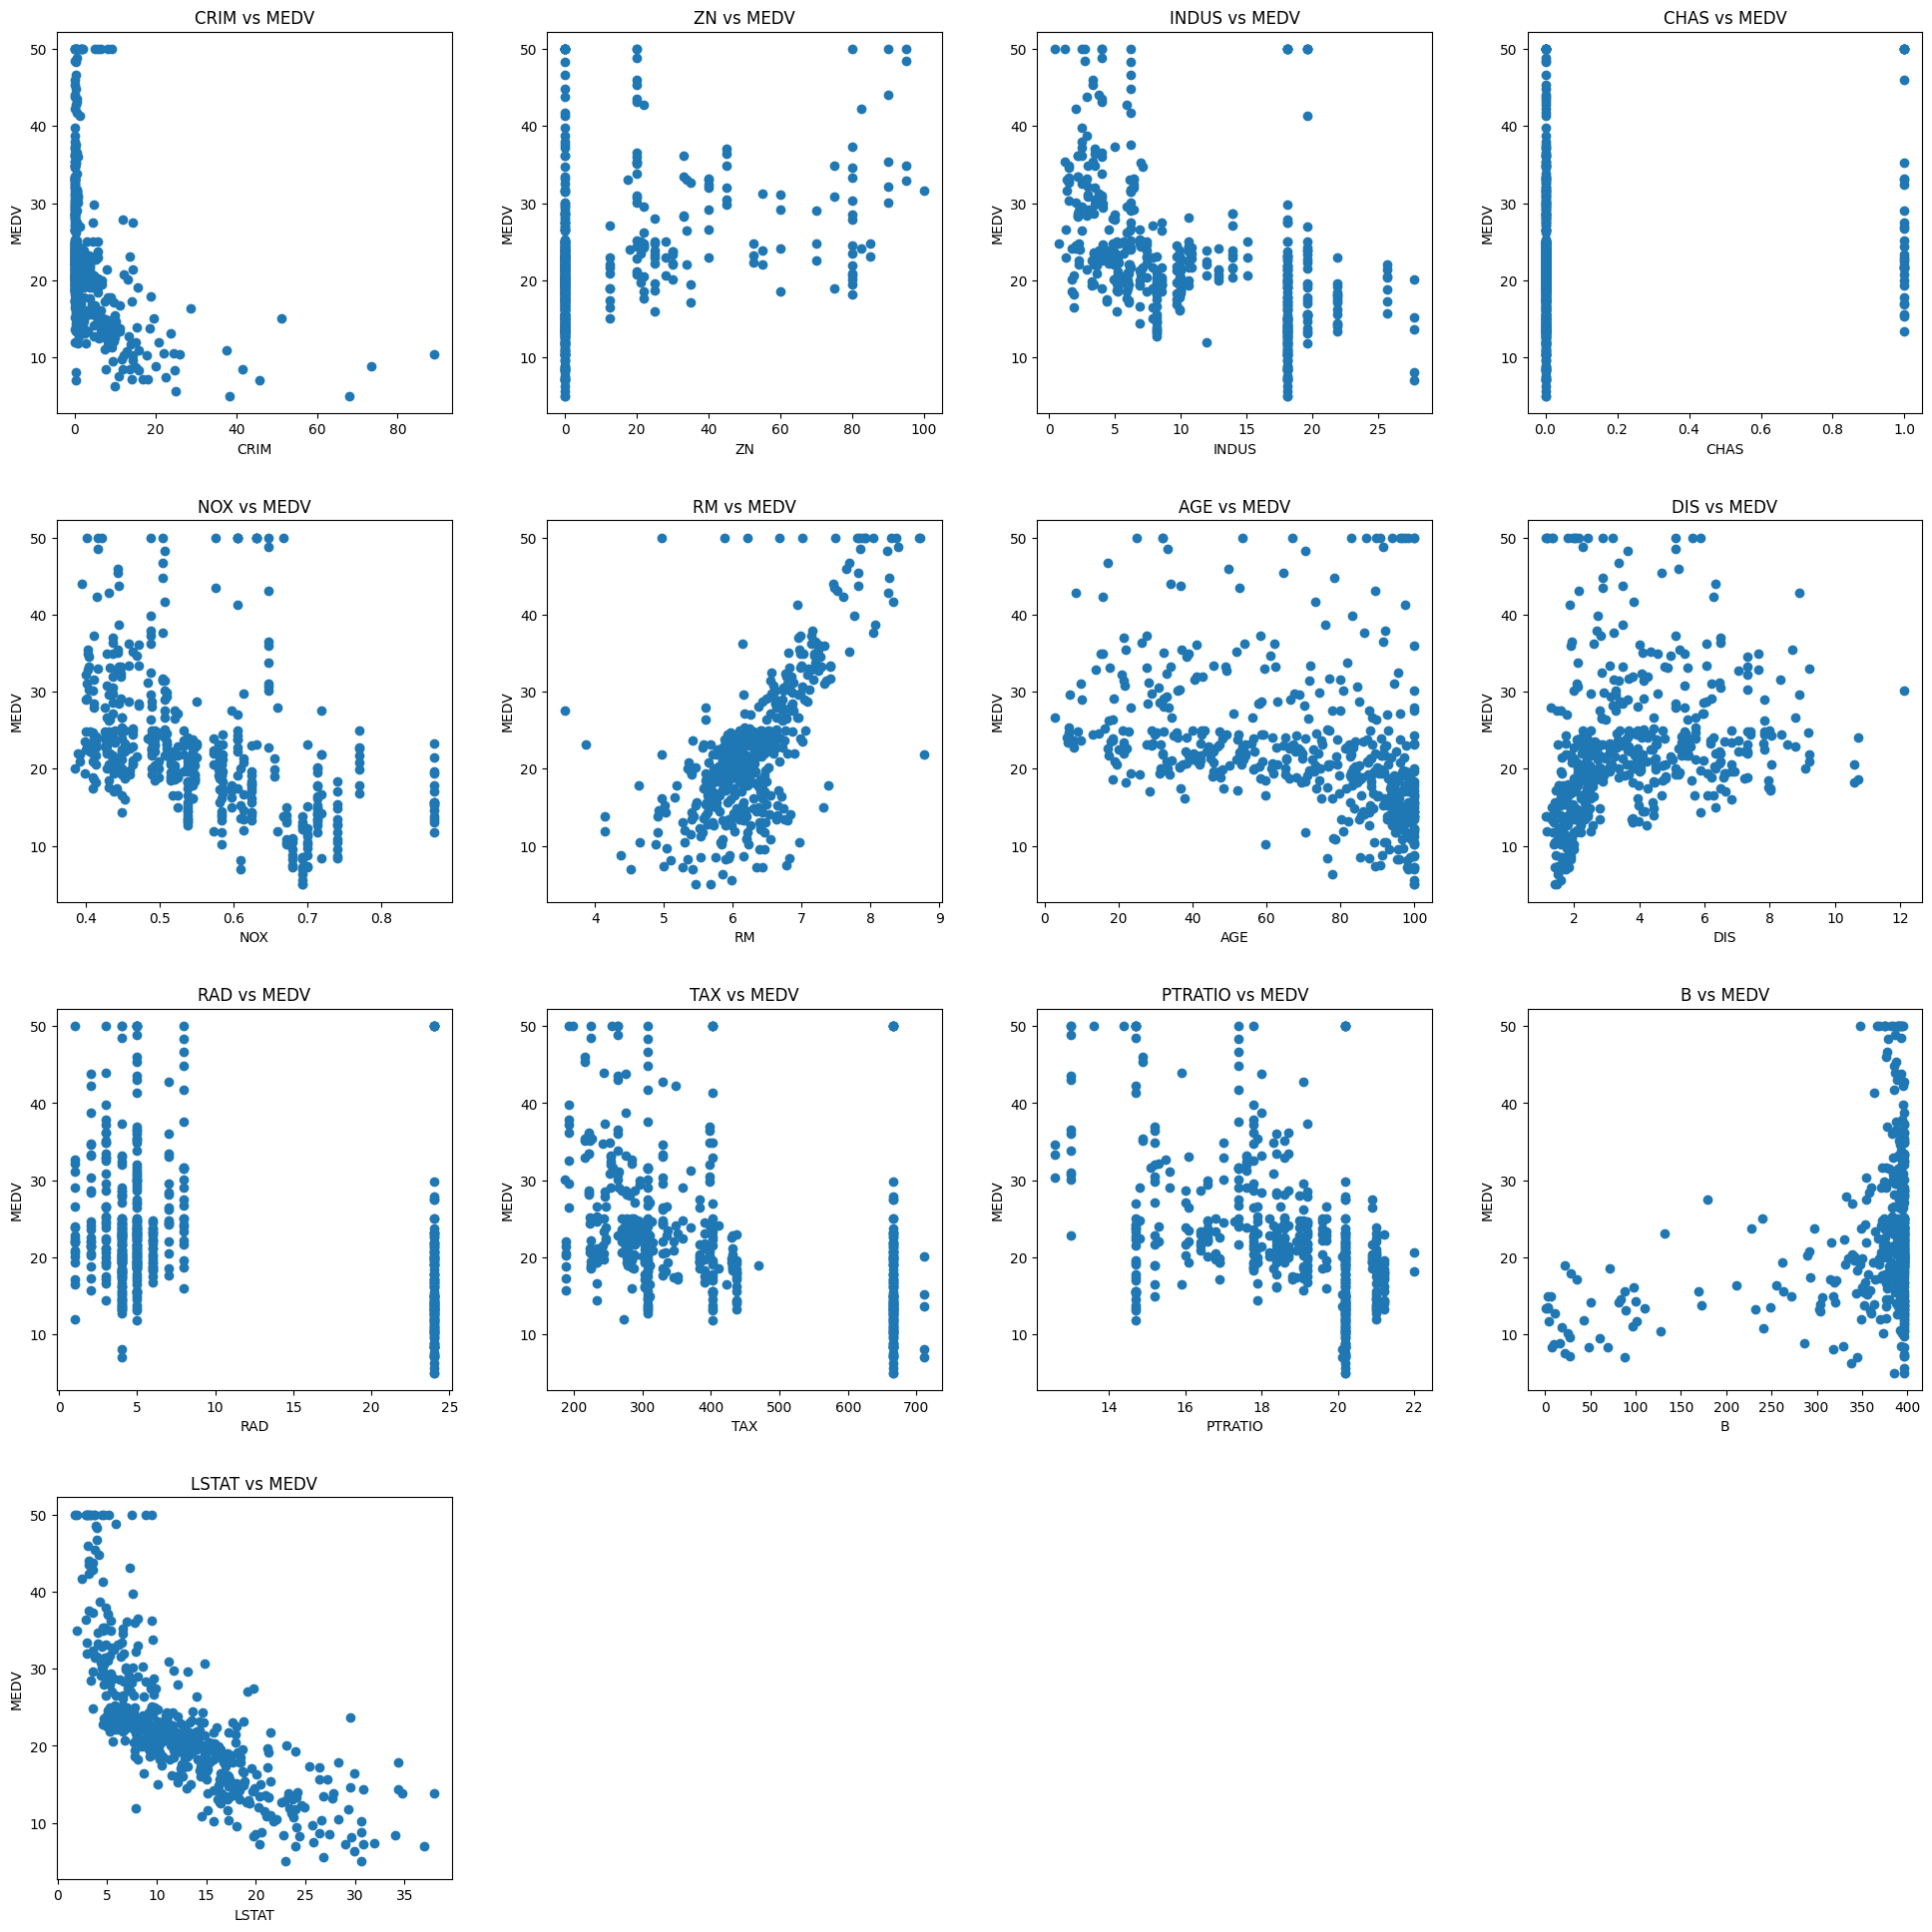

In [31]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    column = boston.columns[i]
    ax.scatter(boston[column], boston['MEDV'])
    ax.set_title(f'{column} vs MEDV')
    ax.set_xlabel(column)
    ax.set_ylabel('MEDV')

plt.tight_layout(pad=3)
plt.show()

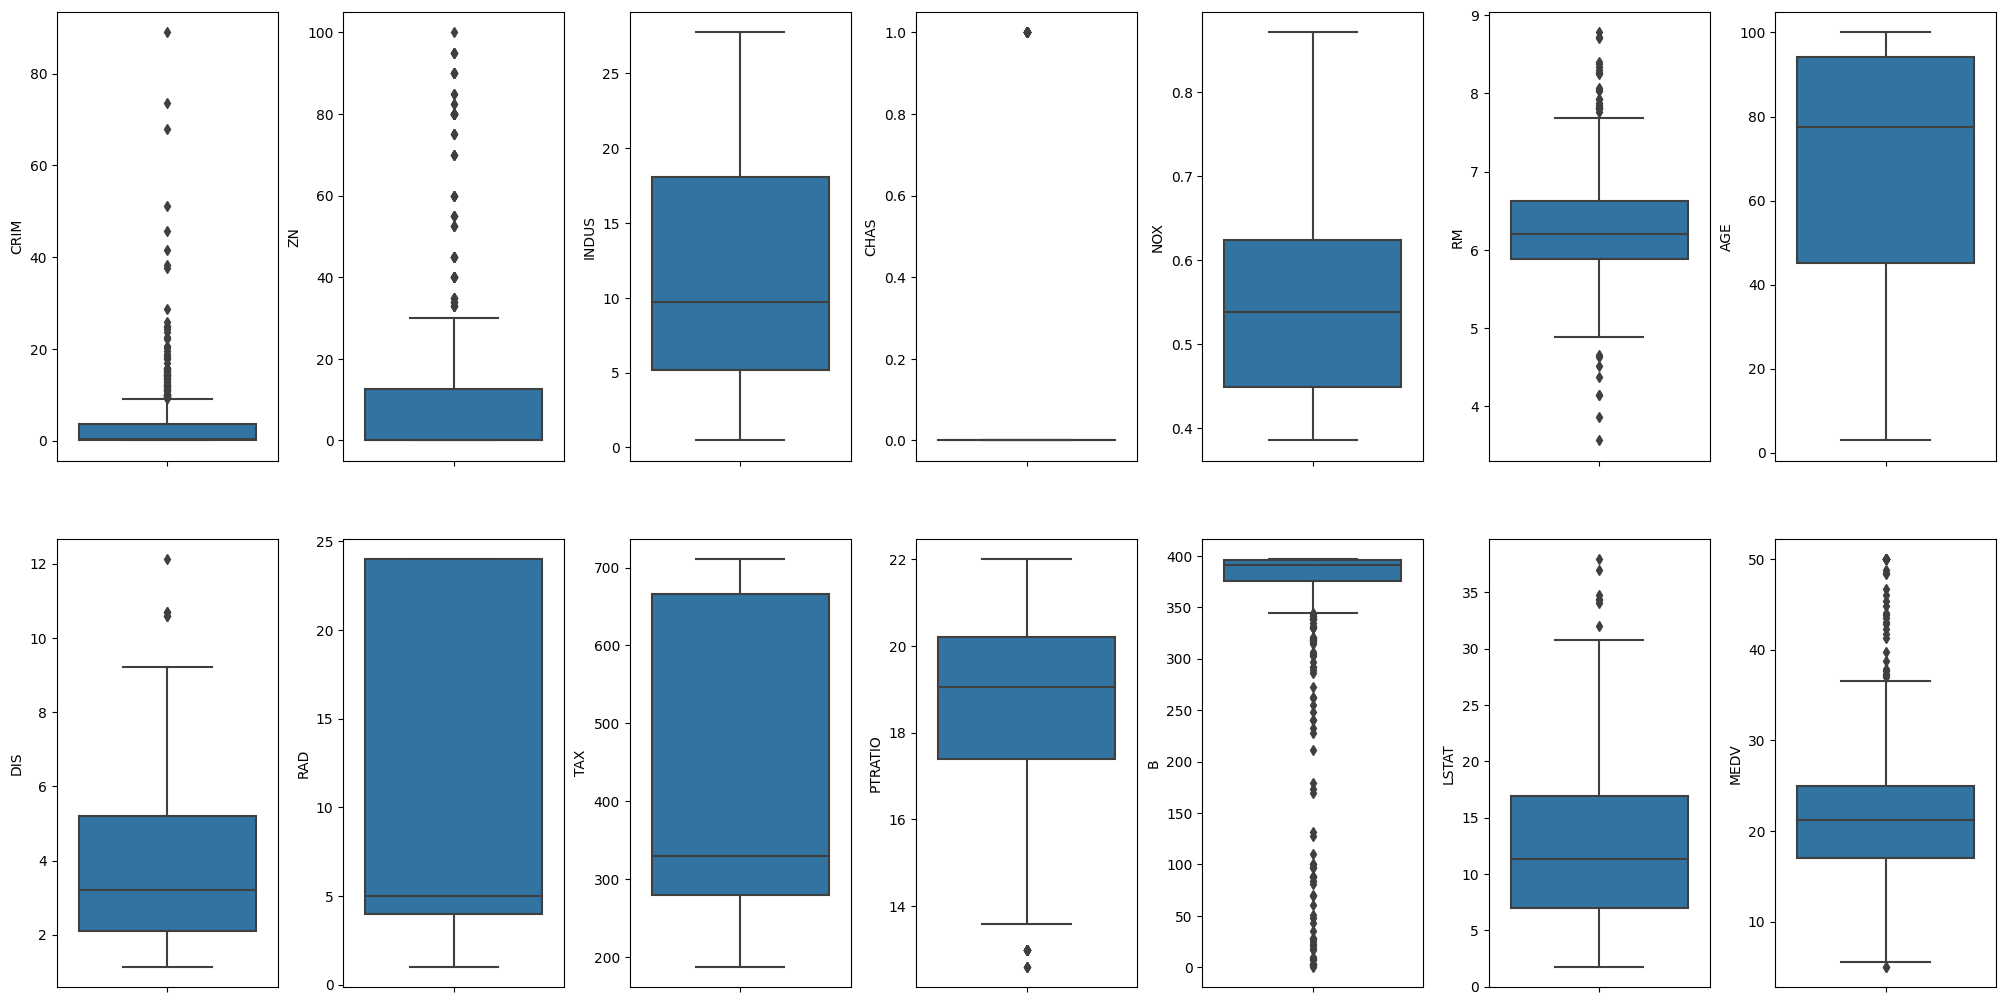

In [34]:
import seaborn as sns
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.boxplot(y=col, data=boston, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"Not-scaled model R^2 score: {score:.3f}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
score_scaled = r2_score(y_test, y_pred_scaled)
print(f"Scaled model R^2 score: {score_scaled:.3f}")


Not-scaled model R^2 score: 0.648
Scaled model R^2 score: 0.719
